In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PlusW/Lecture 7/house_data.csv')
print(df)

       build_year        lat  living_area      long    municipality_name  \
0            1990  47.009808        110.0  8.483789              Vitznau   
1            2017  46.872177        120.0  9.880183     Klosters-Serneus   
2            2010  46.519173        107.0  6.525882          Préverenges   
3            2018  47.521343        103.0  8.536971               Bülach   
4            2007  46.510216         95.0  9.852427  Celerina/Schlarigna   
...           ...        ...          ...       ...                  ...   
22565        2017  47.263515        174.0  8.184093         Reinach (AG)   
22566        2018  47.320694        146.0  8.152993           Dürrenäsch   
22567        1972  46.784409         65.0  9.537591           Churwalden   
22568        1977  46.220421         93.0  6.106879              Vernier   
22569        2016  47.022270        142.0  8.310607                 Horw   

       zipcode  num_rooms object_type_name      price  water_percentage_1000  \
0      

In [ ]:
numeric_df = df.select_dtypes(include = np.number)
df = df.fillna(numeric_df.mean())
print(df)

       build_year        lat  living_area      long    municipality_name  \
0            1990  47.009808        110.0  8.483789              Vitznau   
1            2017  46.872177        120.0  9.880183     Klosters-Serneus   
2            2010  46.519173        107.0  6.525882          Préverenges   
3            2018  47.521343        103.0  8.536971               Bülach   
4            2007  46.510216         95.0  9.852427  Celerina/Schlarigna   
...           ...        ...          ...       ...                  ...   
22565        2017  47.263515        174.0  8.184093         Reinach (AG)   
22566        2018  47.320694        146.0  8.152993           Dürrenäsch   
22567        1972  46.784409         65.0  9.537591           Churwalden   
22568        1977  46.220421         93.0  6.106879              Vernier   
22569        2016  47.022270        142.0  8.310607                 Horw   

       zipcode  num_rooms object_type_name      price  water_percentage_1000  \
0      

In [ ]:
# Check for non-numeric columns (excluding the target variable 'price')
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Non-numeric columns: {non_numeric_columns}")

Non-numeric columns: ['municipality_name', 'object_type_name']


In [ ]:
# Convert categorical columns to numerical using one-hot encoding
if non_numeric_columns:
    df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)

# Ensure 'price' column exists
if 'price' not in df.columns:
    raise KeyError("The dataset does not contain a 'price' column. Please check the CSV file.")

In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['price'])  # Features (all except target)
y = df['price']  # Target variable

# Ensure all feature columns are numeric
if not np.issubdtype(X.dtypes.values[0], np.number):
    raise ValueError("Some features are still non-numeric. Check the dataset preprocessing.")

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'Model Evaluation:')
print(f'MSE: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'adjusted R-squared: {adj_r2:.2f}')

Model Evaluation:
MSE: 149210817251.74
R-squared: 0.49
adjusted R-squared: 0.09


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score

# from google.colab import drive
# drive.mount('/content/drive')

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PlusW/Lecture 7/salary_data.csv')
print(df)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [ ]:
# Preprocess data
df.dropna(inplace=True)
print(df)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [ ]:
# Identify categorical columns
categorical_columns = ['degree', 'job_role', 'location']
existing_categorical_columns = [col for col in categorical_columns if col in df.columns]

# Apply one-hot encoding only if columns exist
if existing_categorical_columns:
    df = pd.get_dummies(df, columns=existing_categorical_columns, drop_first=True)

In [ ]:
# Define features and target variable
if 'Salary' in df.columns:
    X = df.drop(columns=['Salary'])  # Features (everything except 'Salary')
    y = df['Salary']  # Target variable (Salary)

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'MSE: {mse}, R-squared: {r2}')

    # Example prediction
    sample_input = X_test.iloc[[0]]  # Keep feature names
    predicted_salary = model.predict(sample_input)
    print(f'Predicted Salary for sample input: {predicted_salary[0]}')

else:
    print("Error: The 'Salary' column is missing from the dataset.")

MSE: 49830096.85590839, R-squared: 0.9024461774180497
Predicted Salary for sample input: 115790.21011287419


In [ ]:
while True:
    user_input = input('Press 1 to predict Salary, press 0 to show plot: ')

    try:
        user_input = int(user_input)
    except ValueError:
        print("Invalid input. Please enter 1 or 0.")
        continue

    if user_input == 1:
        experience = input('Enter years of experience: ')
        try:
            experience = float(experience)
        except ValueError:
            print("Invalid input for experience. Please enter a valid number.")
            continue

        input_data = pd.DataFrame([[experience]], columns=['YearsExperience'])
        predicted_salary = model.predict(input_data)
        print(f'Predicted Salary for {experience} years of experience: ${predicted_salary[0]:.2f}')

    elif user_input == 0:
        break

    else:
        print('Invalid input. Please enter 1 or 0.')

Press 1 to predict Salary, press 0 to show plot: 1
Enter years of experience: 2
Predicted Salary for 2.0 years of experience: $44169.21
Press 1 to predict Salary, press 0 to show plot: 0
Displaying plot...


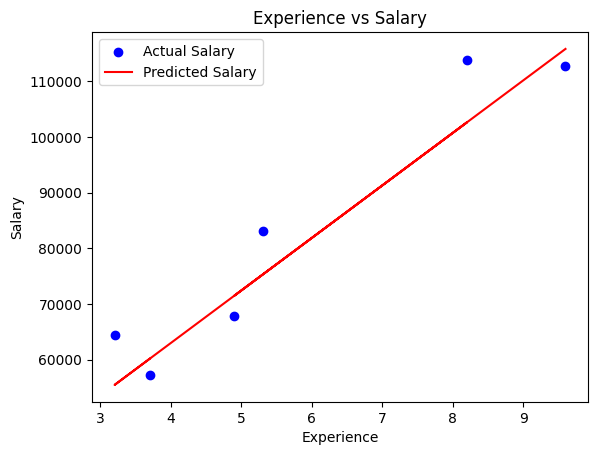

In [ ]:
plt.scatter(X_test['YearsExperience'], y_test, color = 'blue', label = 'Actual Salary')
plt.plot(X_test['YearsExperience'], y_pred, color = 'red', label = 'Predicted Salary')
plt.legend(loc = 'best')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.show()

In [13]:
!pip install streamlit pyngrok

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
import yfinance as yf
import streamlit as st

In [ ]:
# Fetch stock data
def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    df = stock.history(period='5y')
    df = df[['Close', 'Volume']].dropna()
    df['Day'] = np.arange(len(df))
    return df

# Load dataset
ticker = 'AAPL'  # Example stock symbol
df = get_stock_data(ticker)

# Moving averages
df['7_day_avg'] = df['Close'].rolling(window=7).mean()
df['30_day_avg'] = df['Close'].rolling(window=30).mean()

# Drop NaN values due to above
df.dropna(inplace=True)

# Define features and target variable
X = df[['Day', 'Volume', '7_day_avg', '30_day_avg']]
y = df['Close']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'MSE: {mse}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

MSE: 11.839958200737142
R-squared: 0.9926060106098624
Adjusted R-squared: 0.9924832887942585


2025-03-14 11:24:10.356 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 11:24:10.672 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-14 11:24:10.679 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 11:24:10.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 11:24:10.689 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 11:24:10.694 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 11:24:10.699 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-14 11:24:10.807 Thread 'MainThread': mi

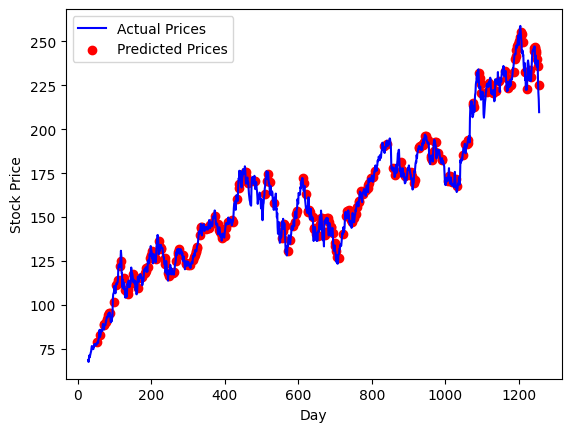

In [ ]:
# Streamlit app for visualization
st.title('Stock Price Trend Prediction')
st.write(f'Stock: {ticker}')

fig, ax = plt.subplots()
ax.plot(df['Day'], df['Close'], label='Actual Prices', color='blue')
ax.scatter(X_test['Day'], y_pred, label='Predicted Prices', color='red')
ax.set_xlabel('Day')
ax.set_ylabel('Stock Price')
ax.legend()
st.pyplot(fig)

# Prediction function
def predict_stock_price(day, volume):
    input_data = np.array([day, volume]).reshape(1, -1)
    return model.predict(input_data)[0]

# User input for prediction
st.sidebar.header('Predict Future Stock Price')
day = st.sidebar.number_input('Enter Future Day:', min_value=int(df['Day'].min()), max_value=int(df['Day'].max()) + 30)
volume = st.sidebar.number_input('Enter Expected Volume:', min_value=int(df['Volume'].min()), max_value=int(df['Volume'].max()))
ma7 = st.sidebar.number_input('Enter 7-day Moving Average:', min_value=float(df['7_day_avg'].min()), max_value=float(df['7_day_avg'].max()))
ma30 = st.sidebar.number_input('Enter 30-day Moving Average:', min_value=float(df['30_day_avg'].min()), max_value=float(df['30_day_avg'].max()))

if st.sidebar.button('Predict'):
    prediction = predict_stock_price(day, volume)
    st.sidebar.write(f'Predicted Stock Price: ${prediction:.2f}')

In [ ]:
!streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.134.111:8501

  Stopping...
^C


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import streamlit as st

# Load dataset
df = pd.read_csv('customer_churn_data.csv')  # Replace with actual dataset

# Preprocess data
df.dropna(inplace=True)  # Remove missing values

# Convert 'churn' column to integers
df['churn'] = df['churn'].astype(str).str.strip().map({'False': 0, 'True': 1})

# Convert categorical columns to numerical
df = pd.get_dummies(df, columns=['international_plan', 'voice_mail_plan'], drop_first=True)

# Drop unnecessary columns
df.drop(columns=['Id', 'state', 'phone_number'], inplace=True)

# Define features and target variable
X = df.drop(columns=['churn'])
y = df['churn']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}\n')
print(report)

# Streamlit app for visualization
st.title('Customer Churn Prediction')
st.write(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix Visualization
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
st.pyplot(fig)

# User input for prediction
st.sidebar.header('Predict Customer Churn')
features = {col: st.sidebar.number_input(f'Enter {col}:', float(X[col].min()), float(X[col].max())) for col in X.columns}

if st.sidebar.button('Predict'):
    input_data = np.array([features[col] for col in X.columns]).reshape(1, -1)
    prediction = model.predict(input_data)[0]
    st.sidebar.write(f'Predicted Churn: {"Yes" if prediction == 1 else "No"}')

FileNotFoundError: [Errno 2] No such file or directory: 'customer_churn_data.csv'

             country  year iso_code  population           gdp  \
0      ASEAN (Ember)  2000      NaN         NaN           NaN   
1      ASEAN (Ember)  2001      NaN         NaN           NaN   
2      ASEAN (Ember)  2002      NaN         NaN           NaN   
3      ASEAN (Ember)  2003      NaN         NaN           NaN   
4      ASEAN (Ember)  2004      NaN         NaN           NaN   
...              ...   ...      ...         ...           ...   
21807       Zimbabwe  2019      ZWE  15354606.0  2.514642e+10   
21808       Zimbabwe  2020      ZWE  15669663.0  2.317871e+10   
21809       Zimbabwe  2021      ZWE  15993525.0  2.514009e+10   
21810       Zimbabwe  2022      ZWE  16320539.0  2.590159e+10   
21811       Zimbabwe  2023      ZWE  16665407.0           NaN   

       biofuel_cons_change_pct  biofuel_cons_change_twh  \
0                          NaN                      NaN   
1                          NaN                      NaN   
2                          NaN            

2025-03-15 02:55:56.937 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:55:57.026 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-15 02:55:57.027 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:55:57.030 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:55:57.033 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:55:57.035 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:55:57.037 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.



Press Enter


Press Enter



2025-03-15 02:55:59.705 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:55:59.706 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:55:59.711 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:55:59.712 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:55:59.919 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:56:00.751 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:56:00.753 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:56:11.516 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar


Press Enter


Press Enter


Press Enter



2025-03-15 02:56:57.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:56:57.570 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:56:57.571 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:56:57.572 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:56:57.574 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:56:57.575 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:56:57.592 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 02:56:57.783 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

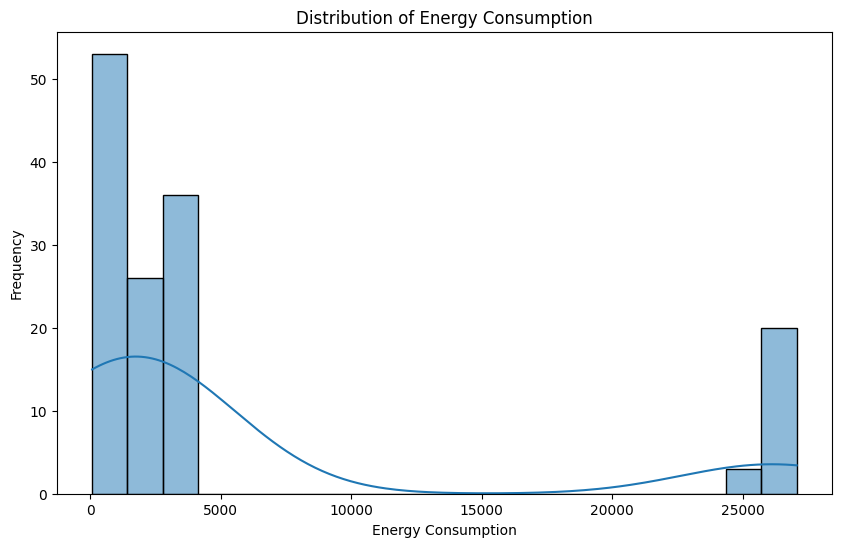

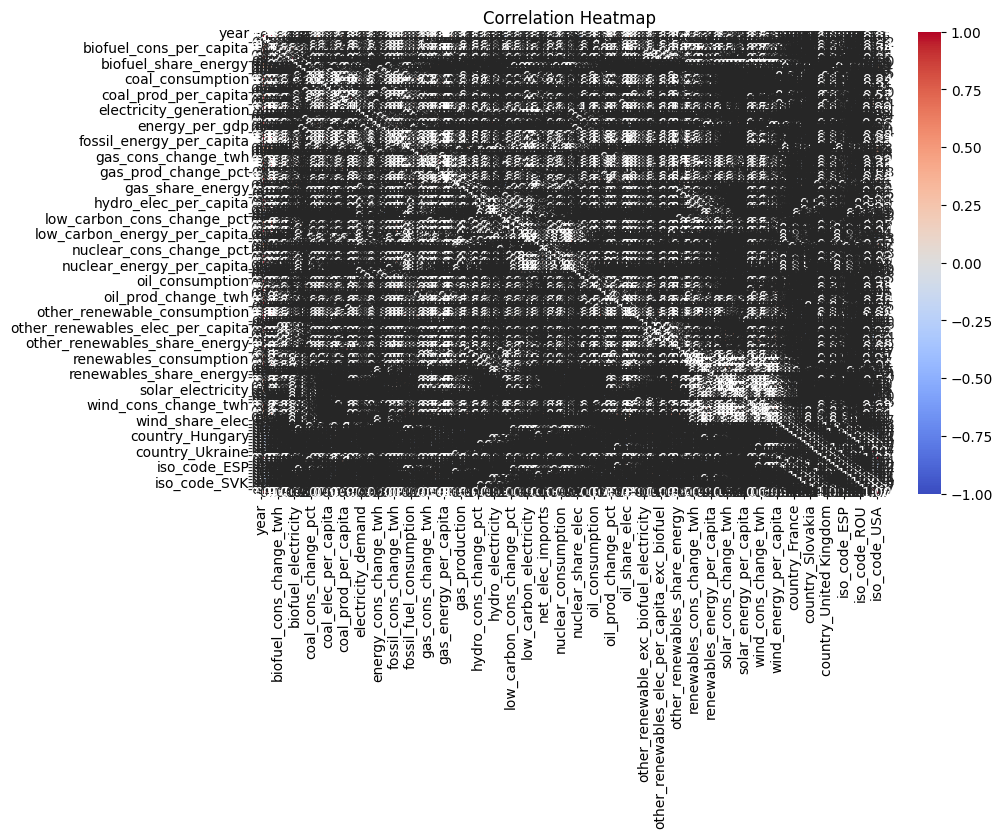

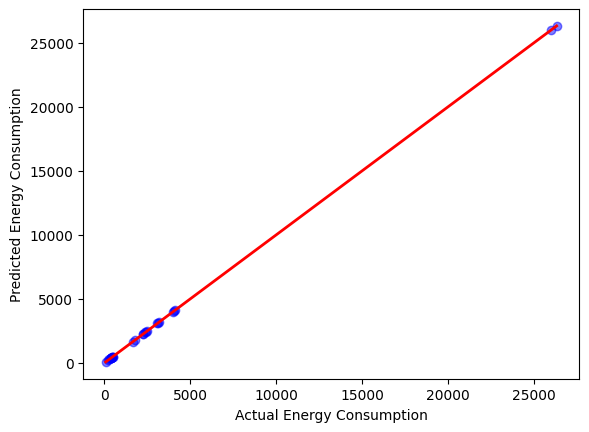

In [29]:
# %%writefile energy.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pyngrok import ngrok
import streamlit as st

# Load dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/PlusW/Lecture 7/owid-energy-data.csv"  # Ensure the correct path to the CSV file
df = pd.read_csv(file_path)
print(df)

input("\nPress Enter\n")

# Display column names to check the correct column name for energy consumption
st.write("Dataset Columns:", df.columns.tolist())

input("\nPress Enter\n")

df['year'] = pd.to_datetime(df['year'], errors='coerce').dt.year

# Preprocess data
df.dropna(inplace=True)

# One-hot encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



input("\nPress Enter\n")

st.write(df.describe())

st.write(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.histplot(df['primary_energy_consumption'], kde=True)
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
st.pyplot(plt)

correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap')
st.pyplot(plt)

input("\nPress Enter\n")



# Define features and target variable
X = df.drop(columns = ['primary_energy_consumption'])
y = df['primary_energy_consumption']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input("\nPress Enter\n")

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

input("\nPress Enter\n")

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Streamlit app
st.title('Energy Consumption Prediction')
st.write(f'MSE: {mse:.2f}, R-squared: {r2:.2f}')

# Visualization
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, alpha=0.5, color='blue')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
ax.set_xlabel('Actual Energy Consumption')
ax.set_ylabel('Predicted Energy Consumption')
st.pyplot(fig)

# User input for prediction
st.sidebar.header('Predict Energy Consumption')
features = {col: st.sidebar.number_input(f'Enter {col}:', float(df[col].min()), float(df[col].max())) for col in X.columns}

if st.sidebar.button('Predict'):
    input_data = np.array([features[col] for col in X.columns]).reshape(1, -1)  # Ensure proper shape for prediction
    prediction = model.predict(input_data)[0]
    st.sidebar.write(f'Predicted Energy Consumption: {prediction:.2f} kWh')

In [23]:
!python energy.py

             country  year iso_code  ...  wind_energy_per_capita  wind_share_elec  wind_share_energy
0      ASEAN (Ember)  2000      NaN  ...                     NaN              0.0                NaN
1      ASEAN (Ember)  2001      NaN  ...                     NaN              0.0                NaN
2      ASEAN (Ember)  2002      NaN  ...                     NaN              0.0                NaN
3      ASEAN (Ember)  2003      NaN  ...                     NaN              0.0                NaN
4      ASEAN (Ember)  2004      NaN  ...                     NaN              0.0                NaN
...              ...   ...      ...  ...                     ...              ...                ...
21807       Zimbabwe  2019      ZWE  ...                     NaN              0.0                NaN
21808       Zimbabwe  2020      ZWE  ...                     NaN              0.0                NaN
21809       Zimbabwe  2021      ZWE  ...                     NaN              0.0          

In [ ]:
!streamlit run energy.py &

from pyngrok import ngrok

public_url = ngrok.connect(port='8501')
public_url